## Precision-Recall-Curves

[Machine Learning with Imbalanced Data - Course](https://www.trainindata.com/p/machine-learning-with-imbalanced-data)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    precision_recall_curve,
    PrecisionRecallDisplay,
    average_precision_score,
    auc,
)

from yellowbrick.classifier import PrecisionRecallCurve

## Load data

In [2]:
# load data
data = pd.read_csv('../kdd2004.csv')

# remap target class to 0 and 1
data['target'] = data['target'].map({-1:0, 1:1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [3]:
# data size

data.shape

(145751, 75)

In [4]:
# imbalanced target

data.target.value_counts(normalize=True)

target
0    0.991108
1    0.008892
Name: proportion, dtype: float64

In [5]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

## Train ML models

### Random Forests

In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

### Logistic Regression

In [7]:
logit = LogisticRegression(random_state=0,  max_iter=1000)

logit.fit(X_train, y_train)

y_train_logit = logit.predict_proba(X_train)[:,1]
y_test_logit = logit.predict_proba(X_test)[:,1]

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Precision-Recall Curve - Plot

[plot_precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_precision_recall_curve.html)

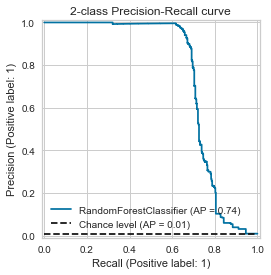

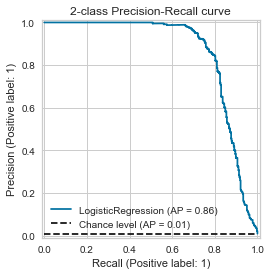

In [16]:
rf_disp = PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, plot_chance_level=True)
_ = rf_disp.ax_.set_title("2-class Precision-Recall curve")

logit_disp = PrecisionRecallDisplay.from_estimator(logit, X_test, y_test, plot_chance_level=True)
_ = logit_disp.ax_.set_title("2-class Precision-Recall curve")

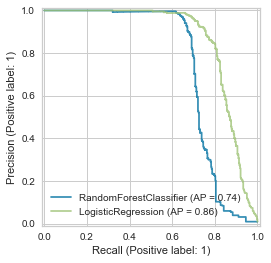

In [9]:
ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
logit_disp.plot(ax=ax, alpha=0.8)

## Area under the PR Curve

[precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve)

[auc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc)

In [10]:
# random forests

# first find preciion and recall various at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_rf)

# then using these values, determine the area under the curve
auc_logit = auc(recall, precision)
print('Area under PR Curve Random Forests: ', auc_logit)

# logistic regression

# first find preciion and recall various at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_logit)

# then using these values, determine the area under the curve
auc_logit = auc(recall, precision)
print('Area under PR Curve Logistic Regression: ', auc_logit)

Area under PR Curve Random Forests:  0.7455492886184477
Area under PR Curve Logistic Regression:  0.862875404360391


## Average Precision Score

It is another way of summarizing the PR Curve.

[average_precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score)

In [11]:
# random forests
ap_rf = average_precision_score(y_test, y_test_rf)
print('Average Precision Random Forests: ', ap_rf)

# logistic regression
ap_logit = average_precision_score(y_test, y_test_logit)
print('Average Precision Logistic Regression: ', ap_logit)

Average Precision Random Forests:  0.7435373757327486
Average Precision Logistic Regression:  0.8629463843382006


### Yellobrick

https://www.scikit-yb.org/en/latest/api/classifier/prcurve.html

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


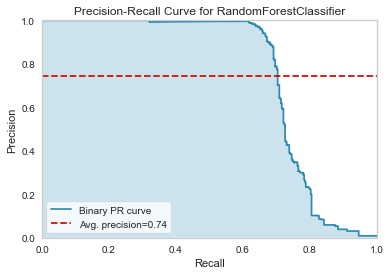

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [12]:
visualizer = PrecisionRecallCurve(rf, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


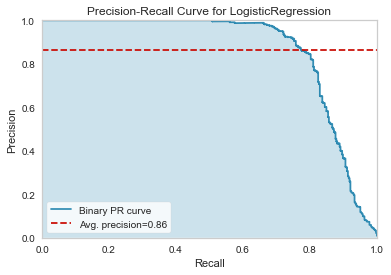

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [13]:
visualizer = PrecisionRecallCurve(logit, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## Additional Reading

https://towardsdatascience.com/on-roc-and-precision-recall-curves-c23e9b63820c

There is a lot of information in the sklearn documentation as well.